### A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [80]:
μ = 2 # Number of cars
cars_dist = stats.poisson(lamb)
cars_dist

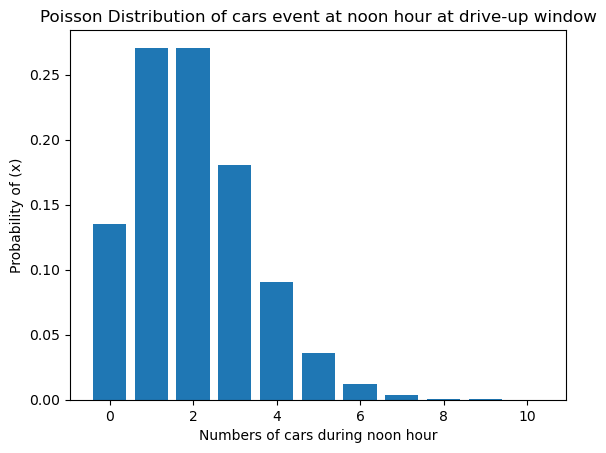

In [81]:
x = np.arange(0,11)
y = stats.poisson(μ).pmf(x)

plt.bar(x,y)

plt.xlabel('Numbers of cars during noon hour')
plt.ylabel('Probability of (x)')
plt.title('Poisson Distribution of cars event at noon hour at drive-up window')
plt.show()

    What is the probability that no cars drive up in the noon hour?


In [82]:
car_dist = stats.poisson(μ).pmf(0)
car_dist

0.1353352832366127

In [83]:
car_dist = round(stats.poisson(μ).pmf(0),2)
car_dist

0.14

    What is the probability that 3 or more cars come through the drive through?


In [85]:
car_dist = stats.poisson(μ).sf(2)
car_dist

0.32332358381693654

    How likely is it that the drive through gets at least 1 car?

In [17]:
car_dist = 1 - stats.poisson(lamb).pmf(0)
car_dist

0.8646647167633873

In [87]:
# 1 grater than zero
car_dist = stats.poisson(μ).sf(0)
car_dist

0.8646647167633873

## Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:



In [10]:
μ = (3.0) # mean
σ = (0.3) # sigma
grade = stats.norm(μ, σ)
grades_dist = stats.norm(μ, σ)
grades_dist

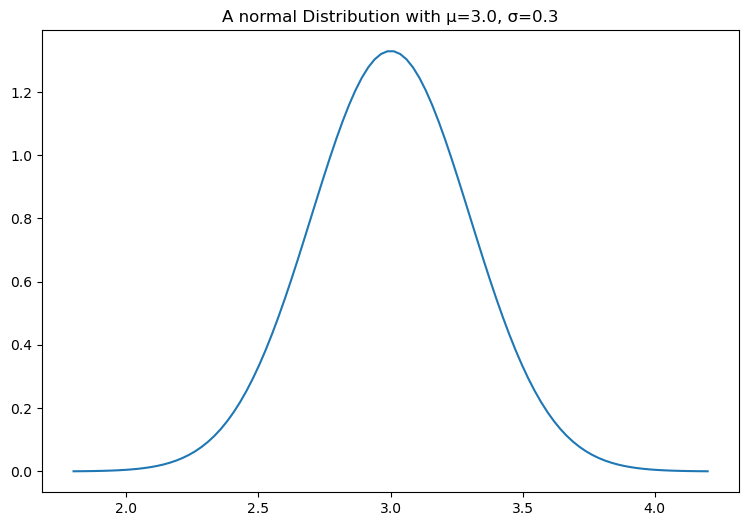

In [12]:
x = np.linspace(μ - 4*σ,μ + 4*σ, 100)
y = grade.pdf(x)

plt.figure(figsize=(9,6))
plt.plot(x,y)
plt.title(f'A normal Distribution with μ={μ}, σ={σ}')
plt.show()

What grade point average is required to be in the top 5% of the graduating class?


In [13]:
round(grade.isf(.05),2)

3.49

In [14]:
# To calculate the top 5% use the ppf and revers number. 
round(grades_dist.isf(.05),2)

3.49

What GPA constitutes the bottom 15% of the class?


In [15]:
round(grades_dist.ppf(.15),2)

2.69

In [19]:
round(grades_dist.isf(.85),2)

2.69

An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. 

In [21]:
grade.ppf([.2, .3])

array([2.74751363, 2.84267985])

In [24]:
(range_of_gpas[0] < 2.8) and (range_of_gpas [1] > 2.8)

True

In [16]:
# percentile_rank = grades_dist.interval((0.1))
# percentile_rank

(2.9623015959434777, 3.0376984040565223)

In [17]:
mean = 3
sd = 0.3
grades_dist = stats.norm(mean, sd)
p10 = grades_dist.ppf(0.2)
p30 = grades_dist.ppf(0.3)
third_decilie = (p10, p30)
third_decilie

(2.7475136299281258, 2.842679846187588)

Would a student with a 2.8 grade point average qualify for this scholarship?

    Yes

In [23]:
range_of_gpas = grade.ppf([.2, .3])

In [25]:
(range_of_gpas[0] < 2.8) and (range_of_gpas [1] > 2.8)

True

If I have a GPA of 3.5, what percentile am I in?

    tenth percentile

In [30]:
mean = 3
sd = .3

# Determine percentiles for each decile
percentiles = [grades_dist.ppf(i/10.0) for i in range(1, 10)]
decile_ranges = [(grades_dist.ppf((i-1)/10.0), grades_dist.ppf(i/10.0)) for i in range(1, 11)]

# Print out GPA range for each decile
for i, decile_range in enumerate(decile_ranges):
    print("GPA range for decile {}:".format(i+1), decile_range)



GPA range for decile 1: (-inf, 2.6155345303366198)
GPA range for decile 2: (2.6155345303366198, 2.7475136299281258)
GPA range for decile 3: (2.7475136299281258, 2.842679846187588)
GPA range for decile 4: (2.842679846187588, 2.9239958690592602)
GPA range for decile 5: (2.9239958690592602, 3.0)
GPA range for decile 6: (3.0, 3.0760041309407398)
GPA range for decile 7: (3.0760041309407398, 3.157320153812412)
GPA range for decile 8: (3.157320153812412, 3.2524863700718742)
GPA range for decile 9: (3.2524863700718742, 3.3844654696633802)
GPA range for decile 10: (3.3844654696633802, inf)


In [26]:
grade.cdf(3.5)

0.9522096477271853

In [28]:
print(f"You are in the {round(grade.cdf(3.5),2)*100}th percentile")

You are in the 95.0th percentile


In [31]:
print(f"You are in the TOP {round(grade.sf(3.5),2)*100}th percentile")

You are in the TOP 5.0th percentile


### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [46]:
trials = 4326 # visitors
clicks = 97
rate = .02 # Probability: Success rate of 2%


In [47]:
click_dist = stats.binom(trials, rate)
click_dist 

<AxesSubplot:ylabel='Frequency'>

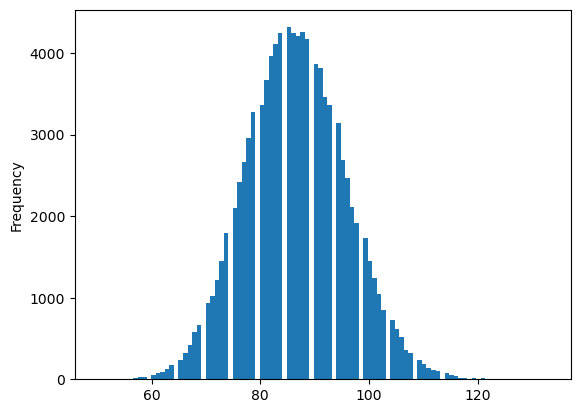

In [49]:
click_dist.rvs(100_000)
pd.Series(click_dist.rvs(100_000)).plot.hist(bins=100)

In [36]:
# Discrete value 97 so to include = 96
click_prob = click_dist.sf(96)
click_prob

0.13975823631416448

In [50]:
clicks = np.random.choice([0,1], (100_000, 4326), rate = [.98, .02])

TypeError: choice() got an unexpected keyword argument 'rate'

In [44]:
(clicks.sum(axis=1)>96).mean()

AttributeError: 'int' object has no attribute 'sum'

###  4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

What is the probability that at least one of your first 60 answers is correct?

In [51]:
n = 60 # first 60 questions
p = 0.01 # 1/100 b'c it's random Number between 0 & 1


In [52]:
stats.binom(n, p)

In [53]:
hmwrk = stats.binom(n,p)
hmwrk.sf(0)

0.45284335760923855

### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 



In [54]:
# number of students= 3 cohorts * 22 students/ea = 66 students total
# 90% visit the breakroom
# only 3% are willing to clean

n_students = round(66 * .9) # round(66 * .9)
p = .03

    How likely is it that the break area gets cleaned up each day?

In [55]:
clean = stats.binom(n_students, p)

In [56]:
clean.sf(0)

0.8342199288437352

    How likely is it that it goes two days without getting cleaned up?

In [58]:
# This means the number of students sivsits doubles!
n = n_students * 2
p = .03
notclean_2 = stats.binom(n,p)

In [60]:
notclean_2.pmf(0)

0.027483031992576134

In [67]:
print(f"It is {round(notclean_2.pmf(0),5)*100}% likely .")

It is 2.748% likely the clean


    All week?

In [64]:
# 5 day's b'c work wk!

# This means the number of students sivsits doubles!
n = n_students * 5
p = .03
notclean_5 = stats.binom(n,p)

In [65]:
notclean_2.pmf(0)

0.027483031992576134

In [68]:
print(f"It is {round(notclean_5.pmf(0),5)*100}% likely that the breakroom goes five days without cleaning.")

It is 0.013% likely that the breakroom goes five days without cleaning.


### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, 

what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [ ]:

# Normal Distribution
# Units of Measurement: Are not the same, so conversion will be needed. 
    # (60 min lunch) - (15 mins to eat) = 45 minutes remaining
    # (45 min left) - (2 min to order food) - (10 min wait for food) = 33 mins avail for wait-time
# Mean (\mu): 15 ppl, but we are measuring in TIME

    # stddev (\sigma): 3 ppl
    # 2 mins/person

In [2]:
# Convert people to time
μ = 15 * 2 # 2 mins/person
σ = 3 * 2

In [3]:
# All this is time
total_lunch_time = 60 # mins
eat_time = 15 
order_time = 2
cook_time = 10

max_wait = (total_lunch_time - eat_time) - order_time - cook_time
max_wait

33

In [4]:
stats.norm(μ, σ).cdf(max_wait)

0.6914624612740131

In [8]:
# Using People insted of time
μ = 15 * 2 # 2 mins/person
σ = 3 * 2

wait_time = 33

# Therefore: (33 ppl) / (2mins)= 16.5


In [6]:
33/2

16.5

In [7]:
μ = 15
σ = 3

stats.norm(μ, σ).cdf(16.5)

0.6914624612740131

<div class="alert alert-block alert-info">
<b>What we know:</b>
</div>

### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.



In [7]:
from env import get_db_url

In [16]:
url = get_db_url('employees')

query = '''
SELECT * FROM salaries where to_date >now()
'''

In [17]:
salaries = pd.read_sql(query, url)

In [18]:
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [19]:
σ = salaries.salary.std()

In [20]:
μ = salaries.salary.mean()

What percent of employees earn less than 60,000?


In [22]:
stats.norm(μ, σ).cdf(60_000)

0.24385742480214423

What percent of employees earn more than 95,000?


In [24]:
stats.norm(μ, σ).sf(95_000)

0.09208819199804053

What percent of employees earn between 65,000 and 80,000?


In [25]:
(stats.norm(μ, σ).cdf(80_000)) - (stats.norm(μ, σ).cdf(65_000))

# 0.3350

0.3350605685446666

In [26]:
np.diff(stats.norm(μ, σ).cdf([65_000,80_000]))
# array([0.33506057])

array([0.33506057])

In [27]:
(1- stats.norm(μ, σ).cdf(65_000)) - stats.norm(μ, σ).sf(80_000)

0.3350605685446666

What do the top 5% of employees make?

In [28]:
stats.norm(μ, σ).isf(.05)
#100484.64454102777

100484.64454102777

In [29]:
stats.norm(μ, σ).ppf(.95)
#100484.64454102777

100484.64454102775